# SHAP for Linear Models

### Loading Libraries

In [13]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns

# SHAP
import shap

# Tabulate
from tabulate import tabulate

# Scikit-Learn
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Retrieving The Wine Data

In [3]:
url = 'https://archive.ics.uci.edu/ml/' \
        'machine-learning-databases/' \
        'wine-quality/winequality-white.csv'

In [4]:
file_name = 'wine.csv'

In [5]:
# Check if the file exists in the current directory, as follows:
try:
    wine = pd.read_csv(file_name)
except FileNotFoundError:
    print(f'Downloading {file_name} from {url}...')
    wine = pd.read_csv(url, sep=";")
    wine.to_csv(file_name, index=False)
    print('Download Complete')

In [6]:
summary = wine.describe().transpose().round(2)

In [7]:
summary = summary.drop("count", axis=1)

In [8]:
# Setting Markdown Table Up
markdown_table = tabulate(
    summary, headers='keys', tablefmt='pipe'
)

In [9]:
print(markdown_table)

|                      |   mean |   std |   min |    25% |    50% |    75% |    max |
|:---------------------|-------:|------:|------:|-------:|-------:|-------:|-------:|
| fixed acidity        |   6.85 |  0.84 |  3.8  |   6.3  |   6.8  |   7.3  |  14.2  |
| volatile acidity     |   0.28 |  0.1  |  0.08 |   0.21 |   0.26 |   0.32 |   1.1  |
| citric acid          |   0.33 |  0.12 |  0    |   0.27 |   0.32 |   0.39 |   1.66 |
| residual sugar       |   6.39 |  5.07 |  0.6  |   1.7  |   5.2  |   9.9  |  65.8  |
| chlorides            |   0.05 |  0.02 |  0.01 |   0.04 |   0.04 |   0.05 |   0.35 |
| free sulfur dioxide  |  35.31 | 17.01 |  2    |  23    |  34    |  46    | 289    |
| total sulfur dioxide | 138.36 | 42.5  |  9    | 108    | 134    | 167    | 440    |
| density              |   0.99 |  0    |  0.99 |   0.99 |   0.99 |   1    |   1.04 |
| pH                   |   3.19 |  0.15 |  2.72 |   3.09 |   3.18 |   3.28 |   3.82 |
| sulphates            |   0.49 |  0.11 |  0.22 |   0.

### Fitting a Linear Regression Model

In [10]:
# Features
X = wine.drop('quality', axis=1)

# Target
y = wine['quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [17]:
# Placing Model
model = LinearRegression()

# Fitting Model
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(X_train.shape)
print(y_train.shape)

(3918, 11)
(3918,)


In [19]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

In [20]:
print(f"MAE: {mae:.2f}")

MAE: 0.59


### Interpreting The Coefficients

In [23]:
coefs = pd.DataFrame({
    'feature': X.columns.values,
    'coefficient': np.round(model.coef_, 3)
})

In [24]:
print(coefs.to_markdown(index=False))

| feature              |   coefficient |
|:---------------------|--------------:|
| fixed acidity        |         0.046 |
| volatile acidity     |        -1.915 |
| citric acid          |        -0.061 |
| residual sugar       |         0.071 |
| chlorides            |        -0.026 |
| free sulfur dioxide  |         0.005 |
| total sulfur dioxide |        -0     |
| density              |      -124.264 |
| pH                   |         0.601 |
| sulphates            |         0.649 |
| alcohol              |         0.229 |


### Computing SHAP Values

In [25]:
#
explainer = shap.LinearExplainer(model, X_train)

In [26]:
# Object itself
shap.LinearExplainer(model, X_train)

In [27]:
shap.LinearExplainer(model, X_train, algorithm='linear')

In [28]:
shap_values = explainer(X_test)

In [29]:
print(shap_values.values)

[[-0.03479769  0.00306381 -0.00545601 ... -0.06541621  0.05289943
   0.08545841]
 [-0.06234203 -0.45650842  0.00986986 ...  0.00066077  0.01395506
   0.59691113]
 [ 0.01570028  0.07965919 -0.00422994 ...  0.04871676 -0.05095221
   0.36790245]
 ...
 [-0.03938841  0.06051034  0.00680469 ...  0.04871676 -0.05095221
  -0.250421  ]
 [ 0.03406317  0.00306381  0.00067434 ... -0.07142321  0.02044579
  -0.29622273]
 [-0.00266262  0.13710572 -0.00422994 ...  0.18087073 -0.0249893
  -0.13591665]]


### Interpreting SHAP Values

#### Checking on 1st Wine

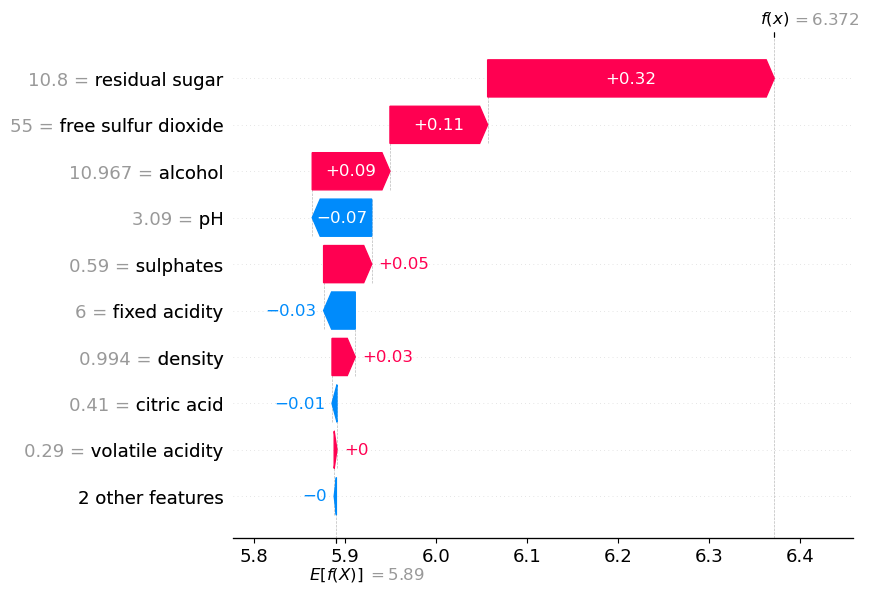

In [33]:
shap.plots.waterfall(shap_values[0])

#### Checking another Wine

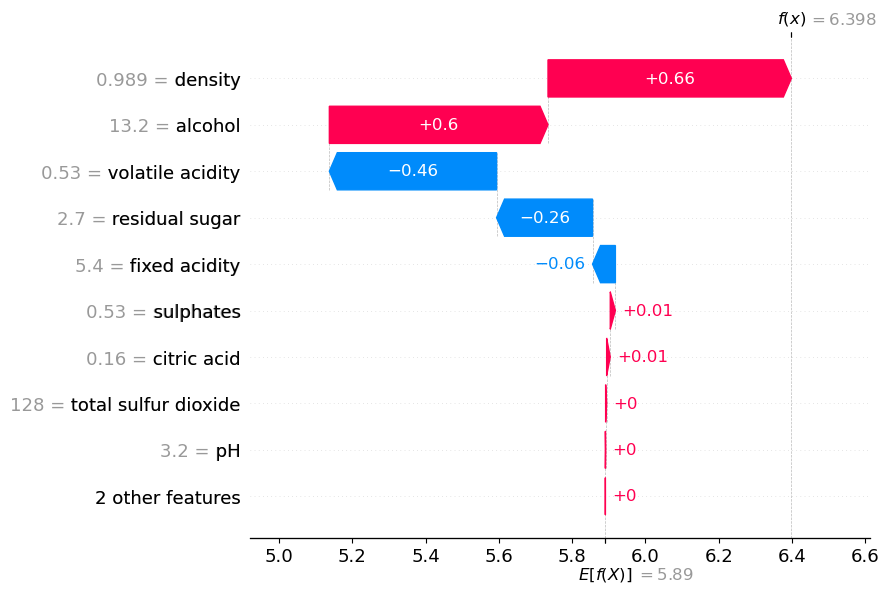

In [34]:
shap.plots.waterfall(shap_values[1])

### Global Model Understanding

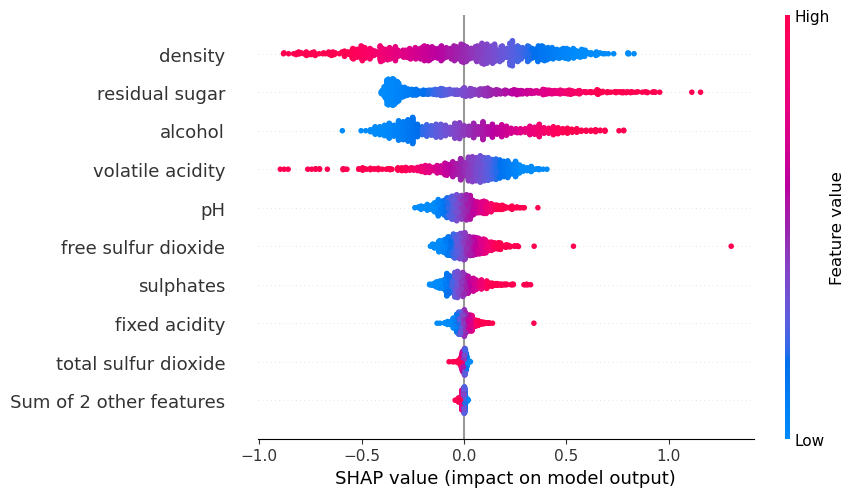

In [35]:
shap.plots.beeswarm(shap_values)

### Comparison between Coefficients & SHAP Values

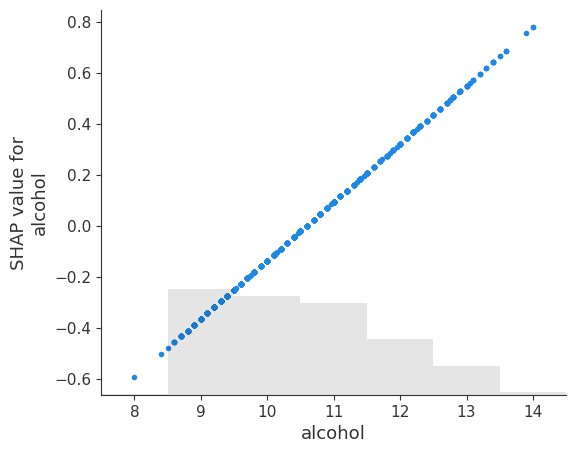

In [36]:
shap.plots.scatter(shap_values[:, 'alcohol'])

In [38]:
feature = 'alcohol'

ind = X_test.columns.get_loc(feature)

coefs.coefficient[ind]

np.float64(0.229)